In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')

full_df.drop(['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url'], axis = 1, inplace = True)
train, test = train_test_split(full_df, test_size=0.3, shuffle=True, random_state=0) # Con shuffle en True, estratificamos al mezclar
                                                                    #random_state para usar siempre la misma semilla
   
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10346, 81)
Dimensiones del dataset de test: (4434, 81)


In [2]:
pd.set_option('display.max_columns', None)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,2156319,3377153,14800635,11185674,18092171,16982161,16585743,8790080,12849889,6932677
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119,20170404145355,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-04,2017-04-08
Name,GRANT VII Plaza Mayor,Nice flat in Plaza Mayor (lift),* ROOM double Barrio Salamanca *,cheap apartment in Madrid city cent,"ACOGEDOR APARTAMENTO EN MADRID, CALLE MANZANARES","Retro apartment, single bedroom + private living","LUMINOSO, CIUDAD LINEAL",Habitación con terraza y WiFi..,Cozy St Germain d´Orsay !!,Penthouse large terrace next to center
Summary,NaN,"Flat is in the centre town, really close to Pl...","Private room for two persons has a double bed,...","Cheap apartment, next to Madrid rio, just four...","Acogedor apartamento, para parejas y/o familia.","Located in a beautiful street, right in the he...",3 líneas de metro e intercambiador de autobuse...,Alquilo habitación..a 200metros del metro..y a...,Cozy & charm one bedroom apartment with a terr...,Quiet and comfortable penthouse with large ter...
...,...,...,...,...,...,...,...,...,...,...
Cancellation Policy,strict,flexible,flexible,flexible,strict,strict,moderate,flexible,strict,moderate
Calculated host listings count,40.0,1.0,3.0,1.0,3.0,4.0,1.0,1.0,7.0,1.0
Reviews per Month,0.24,5.61,5.45,0.16,NaN,1.4,1.61,NaN,0.33,4.76
Geolocation,"40.4154180336,-3.70712273935","40.411131472,-3.7072583983","40.4280496724,-3.6760419089","40.3964492726,-3.71409988867","40.4134467958,-3.71843838152","40.4274461011,-3.66940519225","40.4334285589,-3.63844450434","40.4737431796,-3.58227499094","48.8576468126,2.33100899513","40.4382669899,-3.63953907434"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              10346 non-null  int64  
 1   Scrape ID                       10346 non-null  int64  
 2   Last Scraped                    10346 non-null  object 
 3   Name                            10345 non-null  object 
 4   Summary                         9922 non-null   object 
 5   Space                           7619 non-null   object 
 6   Description                     10340 non-null  object 
 7   Experiences Offered             10346 non-null  object 
 8   Neighborhood Overview           6397 non-null   object 
 9   Notes                           3960 non-null   object 
 10  Transit                         6327 non-null   object 
 11  Access                          5814 non-null   object 
 12  Interaction                     

En un primer vistazo a las columnas, vemos que hay algunas (además de las urls que ya eliminamos al principio) que pueden no aportarnos valor. También hay algunas que pueden ser redundantes, como Geolocation, Latitude y Longitude respecto al barrio. También hemos visto otras cuya gran mayoría de valores son null y que parece que podrían no aportarnos demasiado valor, como License, Has availability, Host aceptance rate u otras.

Por ahora vamos a descartar los IDs del scrap y de los pisos, ya que no parece que puedan tener significado. El nombre del host no tiene sentido que sea relevante, tampoco su ID ya que hay la misma cantidad de Host ID que de pisos, por lo que cada host solo tiene un piso en el dataset, también la fecha del scrap y seguiremos analizando el resto de características antes de tomar más decisiones. También parecen no tener relevancia Host Listing Count y Host Total Listing Count

Hay varias columnas con prácticamente todos sus valores nulos, por lo que no van a sernos de utilidad. Eliminaremos aquellas con más de la mitad de valores nulos. Mantendremos Square Feet para verla más en profundidad, ya que debería ser relevante

In [4]:
descartes = ['ID', 'Scrape ID', 'Last Scraped', 'Name', 'Host Name', 'Host Listings Count', 'Host Total Listings Count', 'Calendar last Scraped', 'Notes', 'Host Acceptance Rate', 'Weekly Price', 'Monthly Price', 'Has Availability', 'License', 'Jurisdiction Names', 'Latitude', 'Longitude', 'Geolocation']
df.drop(descartes, axis = 1, inplace = True)

df.describe()



,Host ID,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.034600e+04,9016.000000,10346.000000,10308.000000,10326.000000,10312.000000,410.000000,10332.000000,4447.000000,6124.000000,10346.000000,10346.000000,10346.000000,10346.000000,10346.000000,10346.00000,10346.000000,10346.000000,10346.000000,7995.000000,7976.000000,7980.000000,7971.000000,7980.000000,7969.000000,7967.000000,10342.000000,8100.000000
mean,3.606270e+07,94.846273,3.290064,1.289726,1.347376,2.053627,395.139024,74.242935,188.551158,32.268452,1.586797,7.641601,3.148560,979.637444,8.979702,22.99913,39.838972,201.677170,22.453412,91.607380,9.411234,9.319799,9.619621,9.643609,9.535073,9.208736,9.658963,1.871260
std,3.417818e+07,15.124996,2.096108,0.668635,0.904172,1.626308,667.520462,72.418780,115.648243,31.545209,1.163591,11.662596,14.211265,10033.724779,9.358143,19.80569,29.735404,128.242731,37.736055,9.121333,0.932933,1.003058,0.810896,0.769159,0.776672,0.960288,23.879225,1.873803
min,1.745300e+04,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,6.884224e+06,100.000000,2.000000,1.000000,1.000000,1.000000,0.000000,35.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.00000,11.000000,77.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,2.483964e+07,100.000000,3.000000,1.000000,1.000000,2.000000,86.000000,57.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.00000,38.000000,238.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.190000
75%,5.431096e+07,100.000000,4.000000,1.000000,2.000000,2.000000,646.000000,88.250000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.00000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.790000
max,1.247534e+08,100.000000,16.000000,8.000000,10.000000,16.000000,6997.000000,969.000000,990.000000,662.000000,16.000000,276.000000,1125.000000,1000000.000000,30.000000,60.00000,90.000000,365.000000,339.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Summary,NaN,"Flat is in the centre town, really close to Pl...","Private room for two persons has a double bed,...","Cheap apartment, next to Madrid rio, just four...","Acogedor apartamento, para parejas y/o familia.","Located in a beautiful street, right in the he...",3 líneas de metro e intercambiador de autobuse...,Alquilo habitación..a 200metros del metro..y a...,Cozy & charm one bedroom apartment with a terr...,Quiet and comfortable penthouse with large ter...
Space,Beautiful and charming apartment recently deco...,You cannot find a better location to stay in M...,It is a penthouse located in the salamanca dis...,NaN,NaN,It's a typical Spanish building with authentic...,Apartamento luminoso y acogedor. Muy cómodo y ...,"habitacion con terraza y wiffi.. cama de 1,35 ...",Cozy & charm one bedroom apartment with a terr...,"Stay near to the downtown, but without its dra..."
Description,Beautiful and charming apartment recently deco...,"Flat is in the centre town, really close to Pl...","Private room for two persons has a double bed,...","Cheap apartment, next to Madrid rio, just four...","Acogedor apartamento, para parejas y/o familia.","Located in a beautiful street, right in the he...",3 líneas de metro e intercambiador de autobuse...,Alquilo habitación..a 200metros del metro..y a...,Cozy & charm one bedroom apartment with a terr...,Quiet and comfortable penthouse with large ter...
Experiences Offered,none,none,none,none,none,none,none,none,none,none
Neighborhood Overview,NaN,"It´s really cool, with a lot of new business (...",The District of Salamanca is one of the 21 dis...,NaN,NaN,Goya is in the northern centre of Madrid. Not ...,"Se trata de un barrio tranquilo, pero a la vez...",NaN,"The elegant 7th is rich with art and culture, ...","The apartment is located in the Alcala street,..."
...,...,...,...,...,...,...,...,...,...,...
Review Scores Value,9.0,9.0,10.0,NaN,NaN,10.0,10.0,NaN,10.0,10.0
Cancellation Policy,strict,flexible,flexible,flexible,strict,strict,moderate,flexible,strict,moderate
Calculated host listings count,40.0,1.0,3.0,1.0,3.0,4.0,1.0,1.0,7.0,1.0
Reviews per Month,0.24,5.61,5.45,0.16,NaN,1.4,1.61,NaN,0.33,4.76


En una nueva revisión ya habiendo descartado varias características, vemos que hay otras que deberíamos descartar también ya que pueden no contener información objetiva o relevante para el análisis, como Summary, Space o Description. Todas aquellas que son frases (en un análisis mucho más complejo podría haber información relevante por ejemplo, analizando si en aquellas que en House Rules indica que se permiten fiestas incrementa el valor o no, pero estaríamos complejizando mucho el análisis, por lo que descartaremos aquellas que contienen frases para esta tarea, en beneficio de la interpretabilidad, pro dejaremos por ahora aquellas que contienen listas como por ejemplo Amenities o Features.

Respecto de las columnas que se refieren al barrio, vamos a utilizar Neighbourhood y a descartar Neighbourhood Cleansed y Neighbourhoood Group Cleansed, ya que la primera contiene información más granular que las otras.
No parece que First Review y Last Review contengan información relevante para determinar el precio, por lo que también las descartaremos

In [6]:
descartes2 = ['Summary', 'Space', 'Description', 'Neighborhood Overview', 'Transit', 'Access', 'Interaction', 'House Rules', 'House Rules', 'Host About', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Maximum Nights', 'Calendar Updated', 'First Review', 'Last Review']
df.drop(descartes2, axis = 1, inplace = True)

df.describe()

,Host ID,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.034600e+04,9016.000000,10346.000000,10308.000000,10326.000000,10312.000000,410.000000,10332.000000,4447.000000,6124.000000,10346.000000,10346.000000,10346.000000,10346.000000,10346.00000,10346.000000,10346.000000,10346.000000,7995.000000,7976.000000,7980.000000,7971.000000,7980.000000,7969.000000,7967.000000,10342.000000,8100.000000
mean,3.606270e+07,94.846273,3.290064,1.289726,1.347376,2.053627,395.139024,74.242935,188.551158,32.268452,1.586797,7.641601,3.148560,8.979702,22.99913,39.838972,201.677170,22.453412,91.607380,9.411234,9.319799,9.619621,9.643609,9.535073,9.208736,9.658963,1.871260
std,3.417818e+07,15.124996,2.096108,0.668635,0.904172,1.626308,667.520462,72.418780,115.648243,31.545209,1.163591,11.662596,14.211265,9.358143,19.80569,29.735404,128.242731,37.736055,9.121333,0.932933,1.003058,0.810896,0.769159,0.776672,0.960288,23.879225,1.873803
min,1.745300e+04,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,6.884224e+06,100.000000,2.000000,1.000000,1.000000,1.000000,0.000000,35.000000,100.000000,15.000000,1.000000,0.000000,1.000000,0.000000,4.00000,11.000000,77.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,2.483964e+07,100.000000,3.000000,1.000000,1.000000,2.000000,86.000000,57.000000,150.000000,25.000000,1.000000,0.000000,2.000000,6.000000,20.00000,38.000000,238.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.190000
75%,5.431096e+07,100.000000,4.000000,1.000000,2.000000,2.000000,646.000000,88.250000,200.000000,40.000000,2.000000,15.000000,3.000000,14.000000,38.00000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.790000
max,1.247534e+08,100.000000,16.000000,8.000000,10.000000,16.000000,6997.000000,969.000000,990.000000,662.000000,16.000000,276.000000,1125.000000,30.000000,60.00000,90.000000,365.000000,339.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             10346 non-null  object 
 1   Host ID                         10346 non-null  int64  
 2   Host Since                      10344 non-null  object 
 3   Host Location                   10318 non-null  object 
 4   Host Response Time              9016 non-null   object 
 5   Host Response Rate              9016 non-null   float64
 6   Host Neighbourhood              7665 non-null   object 
 7   Host Verifications              10342 non-null  object 
 8   Neighbourhood                   6706 non-null   object 
 9   City                            10342 non-null  object 
 10  State                           10240 non-null  object 
 11  Zipcode                         9999 non-null   object 
 12  Market                          

Vamos a revisar algunas de las columnas que no son numéricas, para entenderlas mejor...

In [8]:
#print(df['Experiences Offered'].describe())
print(df['Experiences Offered'].unique())
print(df['Experiences Offered'].value_counts())

# Esta columna podría tener cierta relevancia en cuanto a relacionar el precio con el uso que se le dará al piso
# Pero prácticamente todos son none, por lo que la descartamos
df.drop('Experiences Offered', axis = 1, inplace = True)


['none' 'social' 'business' 'romantic' 'family']
none        10334
business        6
social          3
family          2
romantic        1
Name: Experiences Offered, dtype: int64


In [9]:
df['Host Since'].describe()
# Podríamos crear una nueva columna a partir de esta que nos de la antiguedad en número de años del host

count          10344
unique          1990
top       2016-01-12
freq             135
Name: Host Since, dtype: object

In [10]:
df['antiguedad_host'] = (pd.to_datetime(df['Host Since']).max() - pd.to_datetime(df['Host Since'])).dt.days / 365

df['antiguedad_host'].describe()
df.drop('Host Since', axis = 1, inplace = True)

#(pd.to_datetime(df['Host Since']).max() - pd.to_datetime('2016-01-12')).days / 365

#max(pd.to_datetime(df['Host Since']))

# Obtener la diferencia en años como un valor float
#diferencia_en_anos = diferencia.days / 365.25

In [11]:
ver = ['Host Location', 'Host Response Time', 'Host Neighbourhood', 'Host Verifications', 'Market', 'Smart Location', 'Country Code', 'Cancellation Policy', 'Features']

df[ver].describe()

,Host Location,Host Response Time,Host Neighbourhood,Host Verifications,Market,Smart Location,Country Code,Cancellation Policy,Features
count,10318,9016,7665,10342,10307,10346,10346,10346,10345
unique,468,4,332,179,41,217,18,8,82
top,"Madrid, Community of Madrid, Spain",within an hour,Malasaña,"email,phone,reviews,jumio",Madrid,"Madrid, Spain",ES,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
freq,6601,5544,687,2598,9300,9243,9817,4062,1779


Con esta información, vamos a eliminar algunas columnas más.
Host Location no parece que sea relevante, ya que por lo general va a coincidir con la localización del piso. 
Lo mismo pasa con el Host Neigbourhood
Host verifications parece una lista de formas por las que el host está verificado, tampoco parece relevante para el precio.
Como ya tenemos City, también quitaremos Smart Location y Zipcode.
Al tener país, quitaremos el Country Code, ya que es redundante
Por ahora mantendremos el resto de columnas
Tampoco parece que el tiempo de respuesta a los mensajes del Host y el ratio de respuesta sea muy relevante


In [12]:
descartes3 = ['Host Location', 'Host Neighbourhood', 'Host Verifications', 'Smart Location', 'Country Code', 'Zipcode', 'Host Response Time', 'Host Response Rate']
df.drop(descartes3, axis = 1, inplace = True)

df.head()

,Host ID,Neighbourhood,City,State,Market,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features,antiguedad_host
0,1650712,Sol,Madrid,Community of Madrid,Madrid,Spain,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,85.0,150.0,40.0,2,20,2,0,0,0,0,9,93.0,10.0,9.0,9.0,9.0,10.0,9.0,strict,40.0,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",5.202740
1,17037651,La Latina,Madrid,Comunidad de Madrid,Madrid,Spain,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"Internet,Wireless Internet,Air conditioning,Ki...",NaN,49.0,99.0,20.0,2,10,1,4,16,33,298,182,92.0,9.0,9.0,10.0,10.0,10.0,9.0,flexible,1.0,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",2.800000
2,88187861,NaN,Madrid,Comunidad de Madrid,Madrid,Spain,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,E...",NaN,33.0,NaN,NaN,1,0,1,5,26,45,135,38,97.0,10.0,9.0,10.0,10.0,10.0,10.0,flexible,3.0,5.45,"Host Has Profile Pic,Host Identity Verified,Re...",0.671233
3,32747079,Carabanchel,Madrid,Comunidad de Madrid,Madrid,Spain,Apartment,Entire home/apt,6,1.0,3.0,4.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,F...",NaN,35.0,NaN,NaN,1,0,2,0,0,0,0,2,80.0,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,0.16,"Host Has Profile Pic,Is Location Exact,Require...",1.923288
4,123220020,Imperial,Madrid,Comunidad de Madrid,Madrid,Spain,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,H...",NaN,54.0,100.0,30.0,1,10,2,9,29,59,150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,3.0,NaN,"Host Has Profile Pic,Is Location Exact,Require...",0.024658


In [13]:
# Convertimos Square Feet a Metros Cuadrados

df['metros_cuadrados'] = df['Square Feet']* 0.09290304
df.drop('Square Feet', axis = 1, inplace = True)

df.head()


,Host ID,Neighbourhood,City,State,Market,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features,antiguedad_host,metros_cuadrados
0,1650712,Sol,Madrid,Community of Madrid,Madrid,Spain,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",85.0,150.0,40.0,2,20,2,0,0,0,0,9,93.0,10.0,9.0,9.0,9.0,10.0,9.0,strict,40.0,0.24,"Host Has Profile Pic,Host Identity Verified,Is...",5.202740,NaN
1,17037651,La Latina,Madrid,Comunidad de Madrid,Madrid,Spain,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"Internet,Wireless Internet,Air conditioning,Ki...",49.0,99.0,20.0,2,10,1,4,16,33,298,182,92.0,9.0,9.0,10.0,10.0,10.0,9.0,flexible,1.0,5.61,"Host Has Profile Pic,Host Identity Verified,Is...",2.800000,NaN
2,88187861,NaN,Madrid,Comunidad de Madrid,Madrid,Spain,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,E...",33.0,NaN,NaN,1,0,1,5,26,45,135,38,97.0,10.0,9.0,10.0,10.0,10.0,10.0,flexible,3.0,5.45,"Host Has Profile Pic,Host Identity Verified,Re...",0.671233,NaN
3,32747079,Carabanchel,Madrid,Comunidad de Madrid,Madrid,Spain,Apartment,Entire home/apt,6,1.0,3.0,4.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,F...",35.0,NaN,NaN,1,0,2,0,0,0,0,2,80.0,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,0.16,"Host Has Profile Pic,Is Location Exact,Require...",1.923288,NaN
4,123220020,Imperial,Madrid,Comunidad de Madrid,Madrid,Spain,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,H...",54.0,100.0,30.0,1,10,2,9,29,59,150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,3.0,NaN,"Host Has Profile Pic,Is Location Exact,Require...",0.024658,NaN


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host ID,10346.0,3.606270e+07,3.417818e+07,17453.00,6.884224e+06,2.483964e+07,5.431096e+07,1.247534e+08
Accommodates,10346.0,3.290064e+00,2.096108e+00,1.00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,10308.0,1.289726e+00,6.686352e-01,0.00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Bedrooms,10326.0,1.347376e+00,9.041719e-01,0.00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
Beds,10312.0,2.053627e+00,1.626308e+00,1.00,1.000000e+00,2.000000e+00,2.000000e+00,1.600000e+01
Price,10332.0,7.424293e+01,7.241878e+01,9.00,3.500000e+01,5.700000e+01,8.825000e+01,9.690000e+02
Security Deposit,4447.0,1.885512e+02,1.156482e+02,0.00,1.000000e+02,1.500000e+02,2.000000e+02,9.900000e+02
Cleaning Fee,6124.0,3.226845e+01,3.154521e+01,0.00,1.500000e+01,2.500000e+01,4.000000e+01,6.620000e+02
Guests Included,10346.0,1.586797e+00,1.163591e+00,0.00,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
Extra People,10346.0,7.641601e+00,1.166260e+01,0.00,0.000000e+00,0.000000e+00,1.500000e+01,2.760000e+02


In [15]:
# Parece que hay propietarios con varios pisos, lo que puede ser relevante en el valor al que ofrece cada uno
# (Si tengo varios, puedo hacer ofertas y ganar algo menos por cada piso???)
# Vamos a crear una columna que nos indique el número de propiedades por host

df['Properties_Count'] = df['Host ID'].map(df['Host ID'].value_counts())
df.drop('Host ID', axis = 1, inplace = True)

df.head(8).T

,0,1,2,3,4,5,6,7
Neighbourhood,Sol,La Latina,NaN,Carabanchel,Imperial,NaN,Ciudad Lineal,NaN
City,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
State,Community of Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Community of Madrid,Comunidad de Madrid,Comunidad de Madrid
Market,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
Country,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Private room
Accommodates,4,4,2,6,3,1,4,1
Bathrooms,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bedrooms,1.0,1.0,1.0,3.0,2.0,NaN,1.0,1.0


In [ ]:
 HAY QUE SEGUIR VIENDO CADA VARIABLE SI TIENE ALGÚN SIGNIFICADO. 
    POR EJEMPLO, ENTENDER LAS AVAILABILITY, 
    VER SI LAS DE UBICACIÓN CON BARRIO Y CITY ES SUFICIENTE PARA ELIMINAR EL RESTO,
    VER DE SEPARAR LAS AMENITIES
    VER DE SEPARAR LAS FEATURES
    VER SI SIRVE DE ALGO EL NUMBER OF REVIEWS O ELIMINARLO
    ANALIZAR TODOS LOS SCORES A VER SI SON RELEVANTES (PERO DESPUÉS EN LA MATRIZ)
    VER CÓMO SON LAS POLITICAS DE CANCELACION (SI CASI TODAS SON IGUALES, NO ES RELEVANTE)
    VER QUÉ ES CALCULATED HOST LISTING COUNT, PARA ELIMINARLO
    VER SI REVIEWS PER MONTH SIRVE O SE PUEDE ELIMINAR

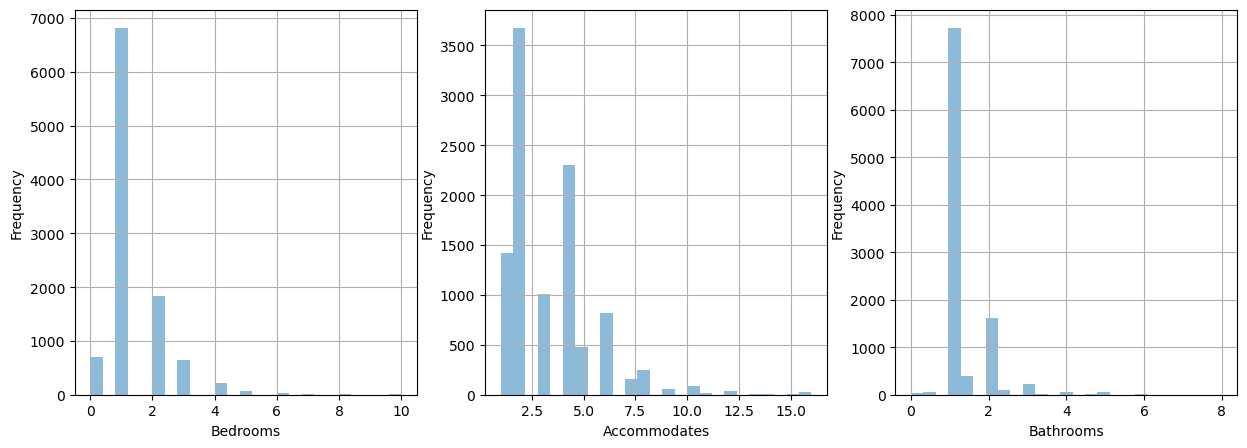

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.subplot(1,3,3)
df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

#plt.subplot(2,3,1)
#df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.xlabel('Bedrooms')

#plt.subplot(2,3,2)
#df['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.xlabel('Beds')



plt.show()

In [ ]:
#import seaborn as sns

#sns.set(style="ticks")

#sns.pairplot(df, hue='Price', markers='o', plot_kws={'alpha': 0.5})
#plt.subplots_adjust(top=0.9)
#plt.suptitle('Matriz de correlación')

#plt.show()